# Objectives
1. Use Excel to visually identify properties of a Numerical Feature
    - Transform using Excel
2. Use Python Pandas to Transform One Numerical Features
3. Next Video: Use **StandardScaler** to transform all Numerical Features at once

## Links
- **Transformation Video** - 
- **Missing Values Video** - https://www.youtube.com/watch?v=pZ8uM_p-pAQ
- SimpleImputer - https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
- select_dtypes - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

# Import Python Packages

In [42]:
import pandas as pd
import numpy as np

# Import Data

In [43]:
train = pd.read_csv('../../DSM_data/data_source1/input/p1_classification_no_missing_train.csv')
test = pd.read_csv('../../DSM_data/data_source1/input/p1_classification_no_missing_test.csv')

### Check Data

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   is_promoted           54808 non-null  int64  
 2   department            54808 non-null  object 
 3   region                54808 non-null  object 
 4   education             54808 non-null  object 
 5   gender                54808 non-null  object 
 6   recruitment_channel   54808 non-null  object 
 7   no_of_trainings       54808 non-null  float64
 8   age                   54808 non-null  float64
 9   previous_year_rating  54808 non-null  float64
 10  length_of_service     54808 non-null  float64
 11  KPIs_met >80%         54808 non-null  float64
 12  awards_won?           54808 non-null  float64
 13  avg_training_score    54808 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 5.9+ MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  float64
 7   age                   23490 non-null  float64
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  float64
 10  KPIs_met >80%         23490 non-null  float64
 11  awards_won?           23490 non-null  float64
 12  avg_training_score    23490 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 2.3+ MB


# Identify Features and Transform

## Identify and Plot 1 Feature

### Describe Data

In [45]:
train.describe()

,employee_id,is_promoted,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,0.085170,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750
std,22586.581449,0.279137,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559
min,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19669.750000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39225.500000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58730.500000,0.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78298.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


### Plot 1 Feature Histogram

<AxesSubplot:ylabel='Frequency'>

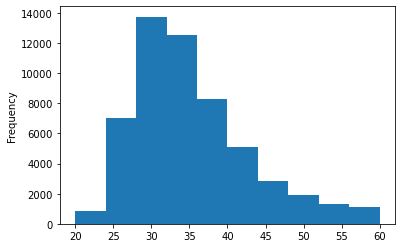

In [47]:
train['age'].plot.hist()

### Treat 1 Feature

![Formula](../images/Zscoreformula.jpg)

In [49]:
train['age_transformed'] = (train['age'] - train['age'].mean()) / train['age'].std()

<AxesSubplot:ylabel='Frequency'>

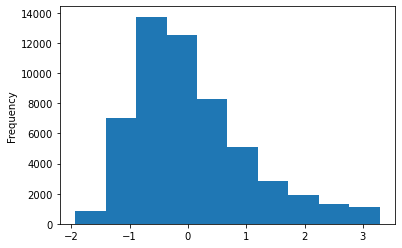

In [51]:
train['age_transformed'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

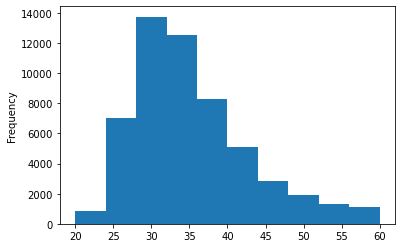

In [52]:
train['age'].plot.hist()

## Identify all Numerical Features and Transform

In [40]:
y = train['is_promoted']
X = train.drop(['is_promoted','employee_id'], axis = 1)

In [41]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'], dtype=object)